In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import Image
import os

In [ ]:
path = '/content/drive/My Drive/ACM Trojan Hacks/'
!ls

drive  sample_data


In [ ]:
img_path = path+"stale_tomato/Copy of IMG_20200727_223202.jpg_0_60.jpg"
len(os.listdir(path+"stale_tomato/")),len(os.listdir(path+"fresh_tomato/"))

(982, 981)

In [ ]:
train_dir = path +"/train"
os.mkdir(train_dir)
test_dir = path +"/test"
os.mkdir(test_dir)

In [ ]:
os.mkdir(train_dir+"/Tomato_Good")
os.mkdir(train_dir+"/Tomato_Bad")
os.mkdir(test_dir+"/Tomato_Good")
os.mkdir(test_dir+"/Tomato_Bad")

In [ ]:
for t in ["/test","/train"]:
  for m in ["_Good","_Bad"]:
    os.mkdir(path+t+"/Banana"+m)


In [ ]:
import random
import shutil
import os

In [ ]:
stale_images = os.listdir(path+"stale_tomato/")
n = len(stale_images)

In [ ]:
test_indices = [random.randint(0,n) for i in range(int(0.2*n))]
for i in test_indices:
  img_path = stale_images[i]
  # print(os.path.isfile(path+"stale_tomato/"+img_path) )
  # print(os.path.isfile(path+"/test/Tomato_Bad/"+img_path) )
  shutil.copy(path+"stale_tomato/"+img_path,path+"/test/Tomato_Bad/"+img_path)  # dst can be a folder; use shutil.copy2() to preserve timestamp

  # os.rename(path+"stale_tomato/"+img_path, path+"/test/Tomato_Bad/"+img_path)

In [ ]:
stale_ban_images = os.listdir(path+"stale_banana/")
n = len(stale_ban_images)
test_indices = [random.randint(0,n) for i in range(int(0.2*n))]
for i in test_indices:
  img_path = stale_ban_images[i]
  shutil.copy(path+"stale_banana/"+img_path,path+"/test/Banana_Bad/"+img_path)  

In [ ]:
fresh_images = os.listdir(path+"fresh_tomato/")


In [ ]:

for i in test_indices:
  img_path = fresh_images[i]
  shutil.copy(path+"fresh_tomato/"+img_path,path+"/test/Tomato_Good/"+img_path)  # dst can be a folder; use shutil.copy2() to preserve timestamp


NameError: ignored

In [ ]:
fresh_ban_images = os.listdir(path+"fresh_banana/")
n = len(fresh_ban_images)
test_indices_2 = [random.randint(0,n) for i in range(int(0.2*n))]
for i in test_indices_2:
  img_path = fresh_ban_images[i]
  shutil.copy(path+"fresh_banana/"+img_path,path+"/test/Banana_Good/"+img_path)  # dst can be a folder; use shutil.copy2() to preserve timestamp


In [ ]:
train_indices_1 = []
for i in range(n):
  if i not in test_indices:
    train_indices_1.append(i)

for i in train_indices_1:
  if i <len(stale_ban_images):
    img_path = stale_ban_images[i]
    shutil.copy(path+"stale_banana/"+img_path,path+"train/Banana_Bad/"+img_path)  # dst can be a folder; use shutil.copy2() to preserve timestamp
  

In [ ]:
train_indices_2 = []
for i in range(n):
  if i not in test_indices_2:
    train_indices_2.append(i)

for i in train_indices_2:
  if i <len(fresh_ban_images):
    img_path = fresh_ban_images[i]
    shutil.copy(path+"fresh_banana/"+img_path,path+"train/Banana_Good/"+img_path)  # dst can be a folder; use shutil.copy2() to preserve timestamp
  

In [ ]:
for i in train_indices:
  if i <len(stale_images):
    img_path = stale_images[i]
    shutil.copy(path+"stale_tomato/"+img_path,path+"train/Tomato_Bad/"+img_path)  # dst can be a folder; use shutil.copy2() to preserve timestamp
  if i <len(fresh_images):
    img_path = fresh_images[i]
    shutil.copy(path+"fresh_tomato/"+img_path,path+"train/Tomato_Good/"+img_path)  # dst can be a folder; use shutil.copy2() to preserve timestamp


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
IMAGE_SIZE = [224, 224]

train_directory=path+"train/"
test_directory=path+"test/"
# val_directory="../input/good-and-bad-fruits-extended/IEEEFRUITSDATA_test&train/test"
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

folders = glob(path+"/train")
len(folders)

87924736/87910968 [==============================] - 2s 0us/step


1

In [ ]:
x = Flatten()(inception.output)

prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

print(len(training_set))
print(len(test_set))

Found 4103 images belonging to 4 classes.
Found 908 images belonging to 4 classes.
129
29


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

model.save(path+"model2.h5")

model_json = model.to_json()
with open(path+"model2.json","w") as f:
  f.write(model_json)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
129/129 [==============================] - 2186s 17s/step - loss: 0.6762 - accuracy: 0.9335 - val_loss: 0.0690 - val_accuracy: 0.9879
Epoch 2/5
129/129 [==============================] - 563s 4s/step - loss: 0.2348 - accuracy: 0.9778 - val_loss: 0.6051 - val_accuracy: 0.9615
Epoch 3/5
129/129 [==============================] - 565s 4s/step - loss: 0.1753 - accuracy: 0.9849 - val_loss: 0.1068 - val_accuracy: 0.9901
Epoch 4/5
129/129 [==============================] - 571s 4s/step - loss: 0.1579 - accuracy: 0.9859 - val_loss: 0.0906 - val_accuracy: 0.9879
Epoch 5/5
129/129 [==============================] - 572s 4s/step - loss: 0.1887 - accuracy: 0.9859 - val_loss: 0.0726 - val_accuracy: 0.9901


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
#model = load_model("../input/final-model-saved/fruit_n_veg_model.h5",compile=False)
import json
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}
print(lab)
print(json.dumps(lab, indent=4))

{0: 'Banana_Bad', 1: 'Banana_Good', 2: 'Tomato_Bad', 3: 'Tomato_Good'}
{
    "0": "Banana_Bad",
    "1": "Banana_Good",
    "2": "Tomato_Bad",
    "3": "Tomato_Good"
}


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.applications import imagenet_utils

In [ ]:

from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import img_to_array
f = open(path+"model2.json","r")
loaded_model_json = f.read()
f.close()

model =  tf.keras.models.model_from_json(loaded_model_json)
model.load_weights(path+'model2.h5')

def predict(image_path):
  # location = "test.jpg"
  img = load_img(image_path,target_size=(224,224,3))

  img = img_to_array(img)
  img = img/255

  img = np.expand_dims(img,[0])
  answer = model.predict(img)
  return answer


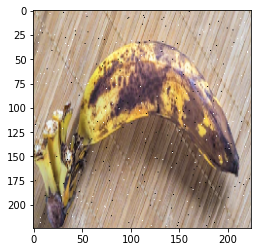

In [ ]:
bad_banana_images = os.listdir(path+"test/Banana_Bad/")
i = random.randint(0,len(bad_banana_images))

location = path+"test/Banana_Bad/"+bad_banana_images[i]
img = load_img(location,target_size=(224,224,3))
plt.imshow(img)

In [ ]:
from tensorflow.keras.utils import img_to_array
img = img_to_array(img)
img = img/255
# plt.imshow(img)

In [ ]:
img = np.expand_dims(img,[0])
answer =model.predict(img)

answer

array([[1., 0., 0., 0.]], dtype=float32)

In [ ]:
import os
for img in os.listdir(path+"stale_banana/"):
  image_path = path+"stale_banana/"+img
  ans = predict(image_path)
  # print(ans[0][0])
  if ans[0][0]>0.5 and ans[0][0]<1 :
    print(ans[0][0],ans,image_path)

0.99990773 [[9.99907732e-01 9.22343897e-05 2.13447445e-29 1.04860265e-29]] /content/drive/My Drive/ACM Trojan Hacks/stale_banana/rotated_by_75_Screen Shot 2018-06-12 at 9.19.42 PM.png
0.9828775 [[9.8287749e-01 1.7122440e-02 1.5185007e-29 3.4620945e-36]] /content/drive/My Drive/ACM Trojan Hacks/stale_banana/saltandpepper_Screen Shot 2018-06-12 at 9.11.52 PM.png
0.9999994 [[9.9999940e-01 5.9381267e-07 8.4421772e-28 1.8266191e-36]] /content/drive/My Drive/ACM Trojan Hacks/stale_banana/Screen Shot 2018-06-12 at 9.11.52 PM.png


In [ ]:
import os
for img in os.listdir(path+"stale_banana/"):
  image_path = path+"stale_banana/"+img
  ans = predict(image_path)
  # print(ans[0][0])
  if ans[0][0]>0.2 and ans[0][0]<1 :
    print(ans[0][0],ans,image_path)

0.99990773 [[9.99907732e-01 9.22343897e-05 2.13447445e-29 1.04860265e-29]] /content/drive/My Drive/ACM Trojan Hacks/stale_banana/rotated_by_75_Screen Shot 2018-06-12 at 9.19.42 PM.png
0.9828775 [[9.8287749e-01 1.7122440e-02 1.5185007e-29 3.4620945e-36]] /content/drive/My Drive/ACM Trojan Hacks/stale_banana/saltandpepper_Screen Shot 2018-06-12 at 9.11.52 PM.png
0.9999994 [[9.9999940e-01 5.9381267e-07 8.4421772e-28 1.8266191e-36]] /content/drive/My Drive/ACM Trojan Hacks/stale_banana/Screen Shot 2018-06-12 at 9.11.52 PM.png


In [ ]:
import os
for img in os.listdir(path+"fresh_banana/"):
  image_path = path+"fresh_banana/"+img
  ans = predict(image_path)
  # print(ans[0][0])
  if ans[0][0]>0.2  :
    print(ans[0][0],ans,image_path)

0.8459553 [[8.4595531e-01 1.5404463e-01 0.0000000e+00 1.0250596e-30]] /content/drive/My Drive/ACM Trojan Hacks/fresh_banana/saltandpepper_Screen Shot 2018-06-12 at 9.47.55 PM.png
1.0 [[1.0000000e+00 3.0459102e-08 0.0000000e+00 2.0354574e-29]] /content/drive/My Drive/ACM Trojan Hacks/fresh_banana/saltandpepper_Screen Shot 2018-06-12 at 9.48.21 PM.png
1.0 [[1.00000000e+00 2.52887827e-16 3.56618576e-36 1.44960205e-36]] /content/drive/My Drive/ACM Trojan Hacks/fresh_banana/saltandpepper_Screen Shot 2018-06-12 at 9.54.18 PM.png
0.99999976 [[9.9999976e-01 1.9700138e-07 2.5812412e-34 1.6777634e-26]] /content/drive/My Drive/ACM Trojan Hacks/fresh_banana/saltandpepper_Screen Shot 2018-06-12 at 9.45.15 PM.png
0.9997371 [[9.9973708e-01 2.6288017e-04 2.2034909e-23 5.5376445e-26]] /content/drive/My Drive/ACM Trojan Hacks/fresh_banana/saltandpepper_Screen Shot 2018-06-12 at 9.47.18 PM.png
0.7922005 [[7.9220051e-01 2.0779954e-01 1.6747733e-16 2.3660918e-09]] /content/drive/My Drive/ACM Trojan Hacks/f

In [ ]:
for img in fresh_images:
  image_path = path+"fresh_tomato/"+img
  ans = predict(image_path)
  # print(ans[0][0])
  if ans[0][0]>0.1:
    print(ans[0][0],ans,image_path)

0.9880634 [[0.9880634  0.01193663]] /content/drive/My Drive/ACM Trojan Hacks/fresh_tomato/DSCN4172.jpg_0_1909.jpg
0.9998703 [[9.998703e-01 1.296292e-04]] /content/drive/My Drive/ACM Trojan Hacks/fresh_tomato/DSCN4172.jpg_0_1913.jpg
